<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week45.do.txt --no_mako -->
<!-- dom:TITLE: Week 45,  Convolutional Neural Networks (CCNs) -->

# Week 45,  Convolutional Neural Networks (CCNs)
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo

Date: **November 3-7, 2025**

## Plans for week 45

**Material for the lecture on Monday November 3, 2025.**

1. Convolutional Neural Networks, codes and examples (TensorFlow and Pytorch implementations)

2. Readings and Videos:
<!-- o These lecture notes at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/pub/week45/ipynb/week45.ipynb> -->
<!-- * [Video of lecture](https://youtu.be/z0x-vgyAZUk) -->
<!-- * [Whiteboard notes](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2023/NotesNov9.pdf) -->

3. For a more in depth discussion on  CNNs and recurrent neural networks we recommend Goodfellow et al chapters 9 and 10. See also chapter 11 and 12 on practicalities and applications    

4. Reading suggestions for implementation of CNNs, see Raschka et al chapters 14-15 at <https://github.com/rasbt/machine-learning-book>.
<!-- o Video  on Recurrent Neural Networks from MIT at <https://www.youtube.com/watch?v=SEnXr6v2ifU&ab_channel=AlexanderAmini> -->

a. Video on Deep Learning at <https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi>

## Material for the lab sessions, additional ways to present classification results and other practicalities

**Material for the active learning sessions on Tuesday and Wednesday.**

1. Discussion of and work on project 2, no exercises this week, only project work

## Material for Lecture Monday November 3

## Convolutional Neural Networks (recognizing images), reminder from last week

Convolutional neural networks (CNNs) were developed during the last
decade of the previous century, with a focus on character recognition
tasks. Nowadays, CNNs are a central element in the spectacular success
of deep learning methods. The success in for example image
classifications have made them a central tool for most machine
learning practitioners.

CNNs are very similar to ordinary Neural Networks.
They are made up of neurons that have learnable weights and
biases. Each neuron receives some inputs, performs a dot product and
optionally follows it with a non-linearity. The whole network still
expresses a single differentiable score function: from the raw image
pixels on one end to class scores at the other. And they still have a
loss function (for example Softmax) on the last (fully-connected) layer
and all the tips/tricks we developed for learning regular Neural
Networks still apply (back propagation, gradient descent etc etc).

## What is the Difference

**CNN architectures make the explicit assumption that
the inputs are images, which allows us to encode certain properties
into the architecture. These then make the forward function more
efficient to implement and vastly reduce the amount of parameters in
the network.**

## Neural Networks vs CNNs

Neural networks are defined as **affine transformations**, that is 
a vector is received as input and is multiplied with a matrix of so-called weights (our unknown paramters) to produce an
output (to which a bias vector is usually added before passing the result
through a nonlinear activation function). This is applicable to any type of input, be it an
image, a sound clip or an unordered collection of features: whatever their
dimensionality, their representation can always be flattened into a vector
before the transformation.

## Why CNNS for images, sound files, medical images from CT scans etc?

However, when we consider images, sound clips and many other similar kinds of data, these data  have an intrinsic
structure. More formally, they share these important properties:
* They are stored as multi-dimensional arrays (think of the pixels of a figure) .

* They feature one or more axes for which ordering matters (e.g., width and height axes for an image, time axis for a sound clip).

* One axis, called the channel axis, is used to access different views of the data (e.g., the red, green and blue channels of a color image, or the left and right channels of a stereo audio track).

These properties are not exploited when an affine transformation is applied; in
fact, all the axes are treated in the same way and the topological information
is not taken into account. Still, taking advantage of the implicit structure of
the data may prove very handy in solving some tasks, like computer vision and
speech recognition, and in these cases it would be best to preserve it. This is
where discrete convolutions come into play.

A discrete convolution is a linear transformation that preserves this notion of
ordering. It is sparse (only a few input units contribute to a given output
unit) and reuses parameters (the same weights are applied to multiple locations
in the input).

## Regular NNs don’t scale well to full images

As an example, consider
an image of size $32\times 32\times 3$ (32 wide, 32 high, 3 color channels), so a
single fully-connected neuron in a first hidden layer of a regular
Neural Network would have $32\times 32\times 3 = 3072$ weights. This amount still
seems manageable, but clearly this fully-connected structure does not
scale to larger images. For example, an image of more respectable
size, say $200\times 200\times 3$, would lead to neurons that have 
$200\times 200\times 3 = 120,000$ weights. 

We could have
several such neurons, and the parameters would add up quickly! Clearly,
this full connectivity is wasteful and the huge number of parameters
would quickly lead to possible overfitting.

<!-- dom:FIGURE: [figslides/nn.jpeg, width=500 frac=0.6]  A regular 3-layer Neural Network. -->
<!-- begin figure -->

<img src="figslides/nn.jpeg" width="500"><p style="font-size: 0.9em"><i>Figure 1: A regular 3-layer Neural Network.</i></p>
<!-- end figure -->

## 3D volumes of neurons

Convolutional Neural Networks take advantage of the fact that the
input consists of images and they constrain the architecture in a more
sensible way. 

In particular, unlike a regular Neural Network, the
layers of a CNN have neurons arranged in 3 dimensions: width,
height, depth. (Note that the word depth here refers to the third
dimension of an activation volume, not to the depth of a full Neural
Network, which can refer to the total number of layers in a network.)

To understand it better, the above example of an image 
with an input volume of
activations has dimensions $32\times 32\times 3$ (width, height,
depth respectively). 

The neurons in a layer will
only be connected to a small region of the layer before it, instead of
all of the neurons in a fully-connected manner. Moreover, the final
output layer could  for this specific image have dimensions $1\times 1 \times 10$, 
because by the
end of the CNN architecture we will reduce the full image into a
single vector of class scores, arranged along the depth
dimension. 

<!-- dom:FIGURE: [figslides/cnn.jpeg, width=500 frac=0.6]  A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels). -->
<!-- begin figure -->

<img src="figslides/cnn.jpeg" width="500"><p style="font-size: 0.9em"><i>Figure 1: A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).</i></p>
<!-- end figure -->

## More on Dimensionalities

In fields like signal processing (and imaging as well), one designs
so-called filters. These filters are defined by the convolutions and
are often hand-crafted. One may specify filters for smoothing, edge
detection, frequency reshaping, and similar operations. However with
neural networks the idea is to automatically learn the filters and use
many of them in conjunction with non-linear operations (activation
functions).

As an example consider a neural network operating on sound sequence
data.  Assume that we an input vector $\boldsymbol{x}$ of length $d=10^6$.  We
construct then a neural network with onle hidden layer only with
$10^4$ nodes. This means that we will have a weight matrix with
$10^4\times 10^6=10^{10}$ weights to be determined, together with $10^4$ biases.

Assume furthermore that we have an output layer which is meant to train whether the sound sequence represents a human voice (true) or something else (false).
It means that we have only one output node. But since this output node connects to $10^4$ nodes in the hidden layer, there are in total $10^4$ weights to be determined for the output layer, plus one bias. In total we have

$$
\mathrm{NumberParameters}=10^{10}+10^4+10^4+1 \approx 10^{10},
$$

that is ten billion parameters to determine.

## Further remarks

The main principles that justify convolutions is locality of
information and repetion of patterns within the signal. Sound samples
of the input in adjacent spots are much more likely to affect each
other than those that are very far away. Similarly, sounds are
repeated in multiple times in the signal. While slightly simplistic,
reasoning about such a sound example demonstrates this. The same
principles then apply to images and other similar data.

## Layers used to build CNNs

A simple CNN is a sequence of layers, and every layer of a CNN
transforms one volume of activations to another through a
differentiable function. We use three main types of layers to build
CNN architectures: Convolutional Layer, Pooling Layer, and
Fully-Connected Layer (exactly as seen in regular Neural Networks). We
will stack these layers to form a full CNN architecture.

A simple CNN for image classification could have the architecture:

* **INPUT** ($32\times 32 \times 3$) will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.

* **CONV** (convolutional )layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as $[32\times 32\times 12]$ if we decided to use 12 filters.

* **RELU** layer will apply an elementwise activation function, such as the $max(0,x)$ thresholding at zero. This leaves the size of the volume unchanged ($[32\times 32\times 12]$).

* **POOL** (pooling) layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as $[16\times 16\times 12]$.

* **FC** (i.e. fully-connected) layer will compute the class scores, resulting in volume of size $[1\times 1\times 10]$, where each of the 10 numbers correspond to a class score, such as among the 10 categories of the MNIST images we considered above . As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

## Transforming images

CNNs transform the original image layer by layer from the original
pixel values to the final class scores. 

Observe that some layers contain
parameters and other don’t. In particular, the CNN layers perform
transformations that are a function of not only the activations in the
input volume, but also of the parameters (the weights and biases of
the neurons). On the other hand, the RELU/POOL layers will implement a
fixed function. The parameters in the CONV/FC layers will be trained
with gradient descent so that the class scores that the CNN computes
are consistent with the labels in the training set for each image.

## CNNs in brief

In summary:

* A CNN architecture is in the simplest case a list of Layers that transform the image volume into an output volume (e.g. holding the class scores)

* There are a few distinct types of Layers (e.g. CONV/FC/RELU/POOL are by far the most popular)

* Each Layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function

* Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)

* Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)

## A deep CNN model ([From Raschka et al](https://github.com/rasbt/machine-learning-book))

<!-- dom:FIGURE: [figslides/deepcnn.png, width=500 frac=0.67]  A deep CNN -->
<!-- begin figure -->

<img src="figslides/deepcnn.png" width="500"><p style="font-size: 0.9em"><i>Figure 1: A deep CNN</i></p>
<!-- end figure -->

## Key Idea

A dense neural network is representd by an affine operation (like matrix-matrix multiplication) where all parameters are included.

The key idea in CNNs for say imaging is that in images neighbor pixels tend to be related! So we connect
only neighboring neurons in the input instead of connecting all with the first hidden layer.

We say we perform a filtering (convolution is the mathematical operation).

## Mathematics of CNNs

The mathematics of CNNs is based on the mathematical operation of
**convolution**.  In mathematics (in particular in functional analysis),
convolution is represented by mathematical operations (integration,
summation etc) on two functions in order to produce a third function
that expresses how the shape of one gets modified by the other.
Convolution has a plethora of applications in a variety of
disciplines, spanning from statistics to signal processing, computer
vision, solutions of differential equations,linear algebra,
engineering, and yes, machine learning.

Mathematically, convolution is defined as follows (one-dimensional example):
Let us define a continuous function $y(t)$ given by

$$
y(t) = \int x(a) w(t-a) da,
$$

where $x(a)$ represents a so-called input and $w(t-a)$ is normally called the weight function or kernel.

The above integral is written in  a more compact form as

$$
y(t) = \left(x * w\right)(t).
$$

The discretized version reads

$$
y(t) = \sum_{a=-\infty}^{a=\infty}x(a)w(t-a).
$$

Computing the inverse of the above convolution operations is known as deconvolution and the process is commutative.

How can we use this? And what does it mean? Let us study some familiar examples first.

## Convolution Examples: Polynomial multiplication

Our first example is that of a multiplication between two polynomials,
which we will rewrite in terms of the mathematics of convolution. In
the final stage, since the problem here is a discrete one, we will
recast the final expression in terms of a matrix-vector
multiplication, where the matrix is a so-called [Toeplitz matrix
](https://link.springer.com/book/10.1007/978-93-86279-04-0).

Let us look a the following polynomials to second and third order, respectively:

$$
p(t) = \alpha_0+\alpha_1 t+\alpha_2 t^2,
$$

and

$$
s(t) = \beta_0+\beta_1 t+\beta_2 t^2+\beta_3 t^3.
$$

The polynomial multiplication gives us a new polynomial of degree $5$

$$
z(t) = \delta_0+\delta_1 t+\delta_2 t^2+\delta_3 t^3+\delta_4 t^4+\delta_5 t^5.
$$

## Efficient Polynomial Multiplication

Computing polynomial products can be implemented efficiently if we rewrite the more brute force multiplications using convolution.
We note first that the new coefficients are given as

$$
\begin{split}
\delta_0=&\alpha_0\beta_0\\
\delta_1=&\alpha_1\beta_0+\alpha_0\beta_1\\
\delta_2=&\alpha_0\beta_2+\alpha_1\beta_1+\alpha_2\beta_0\\
\delta_3=&\alpha_1\beta_2+\alpha_2\beta_1+\alpha_0\beta_3\\
\delta_4=&\alpha_2\beta_2+\alpha_1\beta_3\\
\delta_5=&\alpha_2\beta_3.\\
\end{split}
$$

We note that $\alpha_i=0$ except for $i\in \left\{0,1,2\right\}$ and $\beta_i=0$ except for $i\in\left\{0,1,2,3\right\}$.

We can then rewrite the coefficients $\delta_j$ using a discrete convolution as

$$
\delta_j = \sum_{i=-\infty}^{i=\infty}\alpha_i\beta_{j-i}=(\alpha * \beta)_j,
$$

or as a double sum with restriction $l=i+j$

$$
\delta_l = \sum_{ij}\alpha_i\beta_{j}.
$$

## Further simplification

Although we may have redundant operations with some few zeros for $\beta_i$, we can rewrite the above sum in a more compact way as

$$
\delta_i = \sum_{k=0}^{k=m-1}\alpha_k\beta_{i-k},
$$

where $m=3$ in our case, the maximum length of
the vector $\alpha$. Note that the vector $\boldsymbol{\beta}$ has length $n=4$. Below we will find an even more efficient representation.

## A more efficient way of coding the above Convolution

Since we only have a finite number of $\alpha$ and $\beta$ values
which are non-zero, we can rewrite the above convolution expressions
as a matrix-vector multiplication

$$
\boldsymbol{\delta}=\begin{bmatrix}\alpha_0 & 0 & 0 & 0 \\
                            \alpha_1 & \alpha_0 & 0 & 0 \\
			    \alpha_2 & \alpha_1 & \alpha_0 & 0 \\
			    0 & \alpha_2 & \alpha_1 & \alpha_0 \\
			    0 & 0 & \alpha_2 & \alpha_1 \\
			    0 & 0 & 0 & \alpha_2
			    \end{bmatrix}\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3\end{bmatrix}.
$$

## Commutative process

The process is commutative and we can easily see that we can rewrite the multiplication in terms of  a matrix holding $\beta$ and a vector holding $\alpha$.
In this case we have

$$
\boldsymbol{\delta}=\begin{bmatrix}\beta_0 & 0 & 0  \\
                            \beta_1 & \beta_0 & 0  \\
			    \beta_2 & \beta_1 & \beta_0  \\
			    \beta_3 & \beta_2 & \beta_1 \\
			    0 & \beta_3 & \beta_2 \\
			    0 & 0 & \beta_3
			    \end{bmatrix}\begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \alpha_2\end{bmatrix}.
$$

Note that the use of these matrices is for mathematical purposes only
and not implementation purposes.  When implementing the above equation
we do not encode (and allocate memory) the matrices explicitely.  We
rather code the convolutions in the minimal memory footprint that they
require.

## Toeplitz matrices

The above matrices are examples of so-called [Toeplitz
matrices](https://link.springer.com/book/10.1007/978-93-86279-04-0). A
Toeplitz matrix is a matrix in which each descending diagonal from
left to right is constant. For instance the last matrix, which we
rewrite as

$$
\boldsymbol{A}=\begin{bmatrix}a_0 & 0 & 0  \\
                            a_1 & a_0 & 0  \\
			    a_2 & a_1 & a_0  \\
			    a_3 & a_2 & a_1 \\
			    0 & a_3 & a_2 \\
			    0 & 0 & a_3
			    \end{bmatrix},
$$

with elements $a_{ii}=a_{i+1,j+1}=a_{i-j}$ is an example of a Toeplitz
matrix. Such a matrix does not need to be a square matrix.  Toeplitz
matrices are also closely connected with Fourier series, because the multiplication operator by a trigonometric
polynomial, compressed to a finite-dimensional space, can be
represented by such a matrix. The example above shows that we can
represent linear convolution as multiplication of a Toeplitz matrix by
a vector.

## Fourier series and Toeplitz matrices

This is an active and ogoing research area concerning CNNs. The following articles may be of interest
1. [Read more about the convolution theorem and Fouriers series](https://www.sciencedirect.com/topics/engineering/convolution-theorem#:~:text=The%20convolution%20theorem%20(together%20with,k%20)%20G%20(%20k%20)%20.)

2. [Fourier Transform Layer](https://www.sciencedirect.com/science/article/pii/S1568494623006257)

## Generalizing the above one-dimensional case

In order to align the above simple case with the more general
convolution cases, we rename $\boldsymbol{\alpha}$, whose length is $m=3$,
with $\boldsymbol{w}$.  We will interpret $\boldsymbol{w}$ as a weight/filter function
with which we want to perform the convolution with an input variable
$\boldsymbol{x}$ of length $n$.  We will assume always that the filter
$\boldsymbol{w}$ has dimensionality $m \le n$.

We replace thus $\boldsymbol{\beta}$ with $\boldsymbol{x}$ and $\boldsymbol{\delta}$ with $\boldsymbol{y}$ and have

$$
y(i)= \left(x*w\right)(i)= \sum_{k=0}^{k=m-1}w(k)x(i-k),
$$

where $m=3$ in our case, the maximum length of the vector $\boldsymbol{w}$.
Here the symbol $*$ represents the mathematical operation of convolution.

## Memory considerations

This expression leaves us however with some terms with negative
indices, for example $x(-1)$ and $x(-2)$ which may not be defined. Our
vector $\boldsymbol{x}$ has components $x(0)$, $x(1)$, $x(2)$ and $x(3)$.

The index $j$ for $\boldsymbol{x}$ runs from $j=0$ to $j=3$ since $\boldsymbol{x}$ is meant to
represent a third-order polynomial.

Furthermore, the index $i$ runs from $i=0$ to $i=5$ since $\boldsymbol{y}$
contains the coefficients of a fifth-order polynomial.  When $i=5$ we
may also have values of $x(4)$ and $x(5)$ which are not defined.

## Padding

The solution to this is what is called **padding**!  We simply define a
new vector $x$ with two added elements set to zero before $x(0)$ and
two new elements after $x(3)$ set to zero. That is, we augment the
length of $\boldsymbol{x}$ from $n=4$ to $n+2P=8$, where $P=2$ is the padding
constant (a new hyperparameter), see discussions below as well.

## New vector

We have a new vector defined as $x(0)=0$, $x(1)=0$,
$x(2)=\beta_0$, $x(3)=\beta_1$, $x(4)=\beta_2$, $x(5)=\beta_3$,
$x(6)=0$, and $x(7)=0$.

We have added four new elements, which
are all zero. The benefit is that we can rewrite the equation for
$\boldsymbol{y}$, with $i=0,1,\dots,5$,

$$
y(i) = \sum_{k=0}^{k=m-1}w(k)x(i+(m-1)-k).
$$

As an example, we have

$$
y(4)=x(6)w(0)+x(5)w(1)+x(4)w(2)=0\times \alpha_0+\beta_3\alpha_1+\beta_2\alpha_2,
$$

as before except that we have an additional term $x(6)w(0)$, which is zero.

Similarly, for the fifth-order term we have

$$
y(5)=x(7)w(0)+x(6)w(1)+x(5)w(2)=0\times \alpha_0+0\times\alpha_1+\beta_3\alpha_2.
$$

The zeroth-order term is

$$
y(0)=x(2)w(0)+x(1)w(1)+x(0)w(2)=\beta_0 \alpha_0+0\times\alpha_1+0\times\alpha_2=\alpha_0\beta_0.
$$

## Rewriting as dot products

If we now flip the filter/weight vector, with the following term as a typical example

$$
y(0)=x(2)w(0)+x(1)w(1)+x(0)w(2)=x(2)\tilde{w}(2)+x(1)\tilde{w}(1)+x(0)\tilde{w}(0),
$$

with $\tilde{w}(0)=w(2)$, $\tilde{w}(1)=w(1)$, and $\tilde{w}(2)=w(0)$, we can then rewrite the above sum as a dot product of
$x(i:i+(m-1))\tilde{w}$ for element $y(i)$, where $x(i:i+(m-1))$ is simply a patch of $\boldsymbol{x}$ of size $m-1$.

The padding $P$ we have introduced for the convolution stage is just
another hyperparameter which is introduced as part of the
architecture. Similarly, below we will also introduce another
hyperparameter called **Stride** $S$.

## Cross correlation

In essentially all applications one uses what is called cross correlation instead of the standard convolution described above.
This means that multiplication is performed in the same direction and instead of the general expression we have discussed above (with infinite sums)

$$
y(i) = \sum_{k=-\infty}^{k=\infty}w(k)x(i-k),
$$

we have now

$$
y(i) = \sum_{k=-\infty}^{k=\infty}w(k)x(i+k).
$$

Both TensorFlow and PyTorch (as well as our own code example below),
implement the last equation, although it is normally referred to as
convolution.  The same padding rules and stride rules discussed below
apply to this expression as well.

We leave it as an exercise for you to convince yourself that the example we have discussed till now, gives the same final expression using the last expression.

## Two-dimensional objects

We are now ready to start studying the discrete convolutions relevant for convolutional neural networks.
We often use convolutions over more than one dimension at a time. If
we have a two-dimensional image $X$ as input, we can have a **filter**
defined by a two-dimensional **kernel/weight/filter** $W$. This leads to an output $Y$

$$
Y(i,j)=(X * W)(i,j) = \sum_m\sum_n X(m,n)W(i-m,j-n).
$$

Convolution is a commutative process, which means we can rewrite this equation as

$$
Y(i,j)=(X * W)(i,j) = \sum_m\sum_n X(i-m,j-n)W(m,n).
$$

Normally the latter is more straightforward to implement in a machine
larning library since there is less variation in the range of values
of $m$ and $n$.

As mentioned above, most deep learning libraries implement
cross-correlation instead of convolution (although it is referred to as
convolution)

$$
Y(i,j)=(X * W)(i,j) = \sum_m\sum_n X(i+m,j+n)W(m,n).
$$

## CNNs in more detail, simple example

Let assume we have an input matrix $X$ of dimensionality $3\times 3$
and a $2\times 2$ filter $W$ given by the following matrices

$$
\boldsymbol{X}=\begin{bmatrix}x_{00} & x_{01} & x_{02}  \\
                      x_{10} & x_{11} & x_{12}  \\
	              x_{20} & x_{21} & x_{22} \end{bmatrix},
$$

and

$$
\boldsymbol{W}=\begin{bmatrix}w_{00} & w_{01} \\
	              w_{10} & w_{11}\end{bmatrix}.
$$

We introduce now the hyperparameter $S$ **stride**. Stride represents how the filter $W$ moves the convolution process on the matrix $X$.
We strongly recommend the repository on [Arithmetic of deep learning by Dumoulin and Visin](https://github.com/vdumoulin/conv_arithmetic) 

Here we set the stride equal to $S=1$, which means that, starting with the element $x_{00}$, the filter will act on $2\times 2$ submatrices each time, starting with the upper corner and moving according to the stride value column by column. 

Here we perform the operation

$$
Y_(i,j)=(X * W)(i,j) = \sum_m\sum_n X(i-m,j-n)W(m,n),
$$

and obtain

$$
\boldsymbol{Y}=\begin{bmatrix}x_{00}w_{00}+x_{01}w_{01}+x_{10}w_{10}+x_{11}w_{11} & x_{01}w_{00}+x_{02}w_{01}+x_{11}w_{10}+x_{12}w_{11}  \\
	              x_{10}w_{00}+x_{11}w_{01}+x_{20}w_{10}+x_{21}w_{11} & x_{11}w_{00}+x_{12}w_{01}+x_{21}w_{10}+x_{22}w_{11}\end{bmatrix}.
$$

We can rewrite this operation in terms of a matrix-vector multiplication by defining a new vector where we flatten out the inputs as a vector $\boldsymbol{X}'$ of length $9$ and
a matrix $\boldsymbol{W}'$ with dimension $4\times 9$ as

$$
\boldsymbol{X}'=\begin{bmatrix}x_{00} \\ x_{01} \\ x_{02} \\ x_{10} \\ x_{11} \\ x_{12} \\ x_{20} \\ x_{21} \\ x_{22} \end{bmatrix},
$$

and the new matrix

$$
\boldsymbol{W}'=\begin{bmatrix} w_{00} & w_{01} & 0 & w_{10} & w_{11} & 0 & 0 & 0 & 0 \\
                        0  & w_{00} & w_{01} & 0 & w_{10} & w_{11} & 0 & 0 & 0 \\
			0 & 0 & 0 & w_{00} & w_{01} & 0 & w_{10} & w_{11} & 0  \\
                        0 & 0 & 0 & 0 & w_{00} & w_{01} & 0 & w_{10} & w_{11}\end{bmatrix}.
$$

We see easily that performing the matrix-vector multiplication $\boldsymbol{W}'\boldsymbol{X}'$ is the same as the above convolution with stride $S=1$, that is

$$
Y=(\boldsymbol{W}*\boldsymbol{X}),
$$

is now given by $\boldsymbol{W}'\boldsymbol{X}'$ which is a vector of length $4$ instead of the originally resulting  $2\times 2$ output matrix.

## The convolution stage

The convolution stage, where we apply different filters $\boldsymbol{W}$ in
order to reduce the dimensionality of an image, adds, in addition to
the weights and biases (to be trained by the back propagation
algorithm) that define the filters, two new hyperparameters, the so-called
**padding** $P$ and the stride $S$.

## Finding the number of parameters

In the above example we have an input matrix of dimension $3\times
3$. In general we call the input for an input volume and it is defined
by its width $H_1$, height $H_1$ and depth $D_1$. If we have the
standard three color channels $D_1=3$.

The above example has $W_1=H_1=3$ and $D_1=1$.

When we introduce the filter we have the following additional hyperparameters
1. $K$ the number of filters. It is common to perform the convolution of the input several times since by experience shrinking the input too fast does not work well

2. $F$ as the filter's spatial extent

3. $S$ as the stride parameter

4. $P$ as the padding parameter

These parameters are defined by the architecture of the network and are not included in the training.

## New image (or volume)

Acting with the filter on the input volume produces an output volume
which is defined by its width $W_2$, its height $H_2$ and its depth
$D_2$.

These are defined by the following relations

$$
W_2 = \frac{(W_1-F+2P)}{S}+1,
$$

$$
H_2 = \frac{(H_1-F+2P)}{S}+1,
$$

and $D_2=K$.

## Parameters to train, common settings

With parameter sharing, the convolution involves thus  for each filter  $F\times F\times D_1$ weights plus one bias parameter.

In total we have

$$
\left(F\times F\times D_1)\right) \times K+(K\mathrm{--biases}),
$$

parameters to train by back propagation.

It is common to let $K$ come in powers of $2$, that is $32$, $64$, $128$ etc.

**Common settings.**

1. $\begin{array}{c} F=3 & S=1 & P=1 \end{array}$

2. $\begin{array}{c} F=5 & S=1 & P=2 \end{array}$

3. $\begin{array}{c} F=5 & S=2 & P=\mathrm{open} \end{array}$

4. $\begin{array}{c} F=1 & S=1 & P=0 \end{array}$

## Examples of CNN setups

Let us assume we have an input volume $V$ given by an image of dimensionality
$32\times 32 \times 3$, that is three color channels and $32\times 32$ pixels.

We apply a filter of dimension $5\times 5$ ten times with stride $S=1$ and padding $P=0$.

The output volume is given by $(32-5)/1+1=28$, resulting in ten images
of dimensionality $28\times 28\times 3$.

The total number of parameters to train for each filter is then
$5\times 5\times 3+1$, where the last parameter is the bias. This
gives us $76$ parameters for each filter, leading to a total of $760$
parameters for the ten filters.

How many parameters will a filter of dimensionality $3\times 3$
(adding color channels) result in if we produce $32$ new images? Use $S=1$ and $P=0$.

Note that strides constitute a form of **subsampling**. As an alternative to
being interpreted as a measure of how much the kernel/filter is translated, strides
can also be viewed as how much of the output is retained. For instance, moving
the kernel by hops of two is equivalent to moving the kernel by hops of one but
retaining only odd output elements.

## Summarizing: Performing a general discrete convolution ([From Raschka et al](https://github.com/rasbt/machine-learning-book))

<!-- dom:FIGURE: [figslides/discreteconv1.png, width=500 frac=0.67]  A deep CNN -->
<!-- begin figure -->

<img src="figslides/discreteconv1.png" width="500"><p style="font-size: 0.9em"><i>Figure 1: A deep CNN</i></p>
<!-- end figure -->

## Pooling

In addition to discrete convolutions themselves, **pooling** operations
make up another important building block in CNNs. Pooling operations reduce
the size of feature maps by using some function to summarize subregions, such
as taking the average or the maximum value.

Pooling works by sliding a window across the input and feeding the content of
the window to a **pooling function**. In some sense, pooling works very much
like a discrete convolution, but replaces the linear combination described by
the kernel with some other function.

## Pooling arithmetic

In a neural network, pooling layers provide invariance to small translations of
the input. The most common kind of pooling is **max pooling**, which
consists in splitting the input in (usually non-overlapping) patches and
outputting the maximum value of each patch. Other kinds of pooling exist, e.g.,
mean or average pooling, which all share the same idea of aggregating the input
locally by applying a non-linearity to the content of some patches.

## Pooling types ([From Raschka et al](https://github.com/rasbt/machine-learning-book))

<!-- dom:FIGURE: [figslides/maxpooling.png, width=500 frac=0.67]  A deep CNN -->
<!-- begin figure -->

<img src="figslides/maxpooling.png" width="500"><p style="font-size: 0.9em"><i>Figure 1: A deep CNN</i></p>
<!-- end figure -->

## Building convolutional neural networks using Tensorflow and Keras

As discussed above, CNNs are neural networks built from the assumption that the inputs
to the network are 2D images. This is important because the number of features or pixels in images
grows very fast with the image size, and an enormous number of weights and biases are needed in order to build an accurate network.  

As before, we still have our input, a hidden layer and an output. What's novel about convolutional networks
are the **convolutional** and **pooling** layers stacked in pairs between the input and the hidden layer.
In addition, the data is no longer represented as a 2D feature matrix, instead each input is a number of 2D
matrices, typically 1 for each color dimension (Red, Green, Blue).

## Setting it up

It means that to represent the entire
dataset of images, we require a 4D matrix or **tensor**. This tensor has the dimensions:

$$
(n_{inputs},\, n_{pixels, width},\, n_{pixels, height},\, depth) .
$$

## The MNIST dataset again

The MNIST dataset consists of grayscale images with a pixel size of
$28\times 28$, meaning we require $28 \times 28 = 724$ weights to each
neuron in the first hidden layer.

If we were to analyze images of size $128\times 128$ we would require
$128 \times 128 = 16384$ weights to each neuron. Even worse if we were
dealing with color images, as most images are, we have an image matrix
of size $128\times 128$ for each color dimension (Red, Green, Blue),
meaning 3 times the number of weights $= 49152$ are required for every
single neuron in the first hidden layer.

## Strong correlations

Images typically have strong local correlations, meaning that a small
part of the image varies little from its neighboring regions. If for
example we have an image of a blue car, we can roughly assume that a
small blue part of the image is surrounded by other blue regions.

Therefore, instead of connecting every single pixel to a neuron in the
first hidden layer, as we have previously done with deep neural
networks, we can instead connect each neuron to a small part of the
image (in all 3 RGB depth dimensions).  The size of each small area is
fixed, and known as a [receptive](https://en.wikipedia.org/wiki/Receptive_field).

## Layers of a CNN

The layers of a convolutional neural network arrange neurons in 3D: width, height and depth.  
The input image is typically a square matrix of depth 3. 

A **convolution** is performed on the image which outputs
a 3D volume of neurons. The weights to the input are arranged in a number of 2D matrices, known as **filters**.

Each filter slides along the input image, taking the dot product
between each small part of the image and the filter, in all depth
dimensions. This is then passed through a non-linear function,
typically the **Rectified Linear (ReLu)** function, which serves as the
activation of the neurons in the first convolutional layer. This is
further passed through a **pooling layer**, which reduces the size of the
convolutional layer, e.g. by taking the maximum or average across some
small regions, and this serves as input to the next convolutional
layer.

## Systematic reduction

By systematically reducing the size of the input volume, through
convolution and pooling, the network should create representations of
small parts of the input, and then from them assemble representations
of larger areas.  The final pooling layer is flattened to serve as
input to a hidden layer, such that each neuron in the final pooling
layer is connected to every single neuron in the hidden layer. This
then serves as input to the output layer, e.g. a softmax output for
classification.

## Prerequisites: Collect and pre-process data

inputs = (n_inputs, pixel_width, pixel_height, depth) = (1797, 8, 8, 1)
labels = (n_inputs) = (1797,)


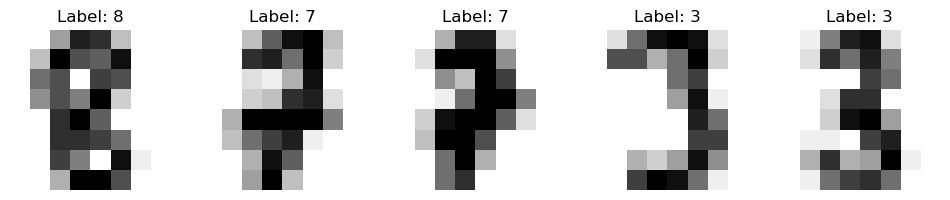

In [1]:
%matplotlib inline

# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

# RGB images have a depth of 3
# our images are grayscale so they should have a depth of 1
inputs = inputs[:,:,:,np.newaxis]

print("inputs = (n_inputs, pixel_width, pixel_height, depth) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# choose some random images to display
n_inputs = len(inputs)
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

## Importing Keras and Tensorflow

In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
#from tensorflow.keras import Conv2D
#from tensorflow.keras import MaxPooling2D
#from tensorflow.keras import Flatten

from sklearn.model_selection import train_test_split

# representation of labels
labels = to_categorical(labels)

# split into train and test data
# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

## Running with Keras

In [3]:
def create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd):
    model = Sequential()
    model.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(n_neurons_connected, activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.Dense(n_categories, activation='softmax', kernel_regularizer=regularizers.l2(lmbd)))
    
    sgd = optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

epochs = 100
batch_size = 100
input_shape = X_train.shape[1:4]
receptive_field = 3
n_filters = 10
n_neurons_connected = 50
n_categories = 10

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

## Final part

In [4]:
CNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd)
        CNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = CNN.evaluate(X_test, Y_test)
        
        CNN_keras[i][j] = CNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

2025-11-03 08:24:08.395576: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


12/12 [==============================] - 0s 25ms/step - loss: 0.0832 - accuracy: 0.9722


Learning rate =  1e-05
Lambda =  1e-05
Test accuracy: 0.972

12/12 [==============================] - 0s 13ms/step - loss: 0.1105 - accuracy: 0.9639


Learning rate =  1e-05
Lambda =  0.0001
Test accuracy: 0.964

12/12 [==============================] - 0s 13ms/step - loss: 0.1502 - accuracy: 0.9778


Learning rate =  1e-05
Lambda =  0.001
Test accuracy: 0.978

12/12 [==============================] - 0s 19ms/step - loss: 0.6805 - accuracy: 0.9722


Learning rate =  1e-05
Lambda =  0.01
Test accuracy: 0.972

12/12 [==============================] - 0s 15ms/step - loss: 0.9657 - accuracy: 0.9333


Learning rate =  1e-05
Lambda =  0.1
Test accuracy: 0.933

12/12 [==============================] - 0s 18ms/step - loss: 2.3062 - accuracy: 0.0889


Learning rate =  1e-05
Lambda =  1.0
Test accuracy: 0.089

12/12 [==============================] - 0s 18ms/step - loss: 2.3065 - accuracy: 0.0778


Learning rate =  1e-05
Lambda =  10.0
Test accuracy: 0.078

12/12 [==============================] - 0s 19ms/step - loss: 0.1015 - accuracy: 0.9639


Learning rate =  0.0001
Lambda =  1e-05
Test accuracy: 0.964

12/12 [==============================] - 0s 20ms/step - loss: 0.1089 - accuracy: 0.9750


Learning rate =  0.0001
Lambda =  0.0001
Test accuracy: 0.975

12/12 [==============================] - 0s 15ms/step - loss: 0.2121 - accuracy: 0.9611


Learning rate =  0.0001
Lambda =  0.001
Test accuracy: 0.961

12/12 [==============================] - 0s 18ms/step - loss: 0.6788 - accuracy: 0.9750


Learning rate =  0.0001
Lambda =  0.01
Test accuracy: 0.975

12/12 [==============================] - 0s 15ms/step - loss: 0.9680 - accuracy: 0.9333


Learning rate =  0.0001
Lambda =  0.1
Test accuracy: 0.933

12/12 [==============================] - 0s 19ms/step - loss: 2.3062 - accuracy: 0.0778


Learning rate =  0.0001
Lambda =  1.0
Test accuracy: 0.078

12/12 [==============================] - 0s 19ms/step - loss: 2.3066 - accuracy: 0.0889


Learning rate =  0.0001
Lambda =  10.0
Test accuracy: 0.089

12/12 [==============================] - 0s 18ms/step - loss: 0.0944 - accuracy: 0.9639
Learning rate =  0.001
Lambda =  1e-05
Test accuracy: 0.964



12/12 [==============================] - 0s 19ms/step - loss: 0.1049 - accuracy: 0.9833


Learning rate =  0.001
Lambda =  0.0001
Test accuracy: 0.983

12/12 [==============================] - 0s 16ms/step - loss: 0.1607 - accuracy: 0.9806


Learning rate =  0.001
Lambda =  0.001
Test accuracy: 0.981

12/12 [==============================] - 0s 18ms/step - loss: 0.6680 - accuracy: 0.9722


Learning rate =  0.001
Lambda =  0.01
Test accuracy: 0.972

12/12 [==============================] - 0s 16ms/step - loss: 1.0152 - accuracy: 0.9000


Learning rate =  0.001
Lambda =  0.1
Test accuracy: 0.900

12/12 [==============================] - 1s 34ms/step - loss: 2.3063 - accuracy: 0.0889
Learning rate =  0.001
Lambda =  1.0
Test accuracy: 0.089



12/12 [==============================] - 0s 18ms/step - loss: 2.3066 - accuracy: 0.0778


Learning rate =  0.001
Lambda =  10.0
Test accuracy: 0.078

12/12 [==============================] - 0s 20ms/step - loss: 0.0861 - accuracy: 0.9639


Learning rate =  0.01
Lambda =  1e-05
Test accuracy: 0.964

12/12 [==============================] - 0s 19ms/step - loss: 0.1131 - accuracy: 0.9694


Learning rate =  0.01
Lambda =  0.0001
Test accuracy: 0.969

12/12 [==============================] - 0s 18ms/step - loss: 0.1855 - accuracy: 0.9694


Learning rate =  0.01
Lambda =  0.001
Test accuracy: 0.969

12/12 [==============================] - 0s 13ms/step - loss: 0.7018 - accuracy: 0.9694


Learning rate =  0.01
Lambda =  0.01
Test accuracy: 0.969

12/12 [==============================] - 0s 13ms/step - loss: 0.9951 - accuracy: 0.9167


Learning rate =  0.01
Lambda =  0.1
Test accuracy: 0.917

12/12 [==============================] - 0s 13ms/step - loss: 2.3065 - accuracy: 0.0778


Learning rate =  0.01
Lambda =  1.0
Test accuracy: 0.078

12/12 [==============================] - 0s 20ms/step - loss: 2.3063 - accuracy: 0.0889


Learning rate =  0.01
Lambda =  10.0
Test accuracy: 0.089



12/12 [==============================] - 0s 14ms/step - loss: 0.0573 - accuracy: 0.9806


Learning rate =  0.1
Lambda =  1e-05
Test accuracy: 0.981

12/12 [==============================] - 0s 21ms/step - loss: 0.1458 - accuracy: 0.9667


Learning rate =  0.1
Lambda =  0.0001
Test accuracy: 0.967

12/12 [==============================] - 0s 17ms/step - loss: 0.1908 - accuracy: 0.9750
Learning rate =  0.1
Lambda =  0.001
Test accuracy: 0.975



12/12 [==============================] - 0s 17ms/step - loss: 0.6431 - accuracy: 0.9806
Learning rate =  0.1
Lambda =  0.01
Test accuracy: 0.981



12/12 [==============================] - 0s 26ms/step - loss: 0.9495 - accuracy: 0.9583
Learning rate =  0.1
Lambda =  0.1
Test accuracy: 0.958



12/12 [==============================] - 0s 19ms/step - loss: 2.3064 - accuracy: 0.0778


Learning rate =  0.1
Lambda =  1.0
Test accuracy: 0.078

12/12 [==============================] - 0s 18ms/step - loss: 2.3066 - accuracy: 0.0778
Learning rate =  0.1
Lambda =  10.0
Test accuracy: 0.078



12/12 [==============================] - 0s 16ms/step - loss: 0.1158 - accuracy: 0.9639
Learning rate =  1.0
Lambda =  1e-05
Test accuracy: 0.964



12/12 [==============================] - 0s 16ms/step - loss: 0.0927 - accuracy: 0.9806


Learning rate =  1.0
Lambda =  0.0001
Test accuracy: 0.981

12/12 [==============================] - 0s 14ms/step - loss: 0.1668 - accuracy: 0.9750


Learning rate =  1.0
Lambda =  0.001
Test accuracy: 0.975

12/12 [==============================] - 0s 16ms/step - loss: 0.6864 - accuracy: 0.9806


Learning rate =  1.0
Lambda =  0.01
Test accuracy: 0.981

12/12 [==============================] - 0s 18ms/step - loss: 0.9669 - accuracy: 0.9306
Learning rate =  1.0
Lambda =  0.1
Test accuracy: 0.931



12/12 [==============================] - 0s 17ms/step - loss: 2.3064 - accuracy: 0.0778


Learning rate =  1.0
Lambda =  1.0
Test accuracy: 0.078



12/12 [==============================] - 0s 13ms/step - loss: 2.3064 - accuracy: 0.0889


Learning rate =  1.0
Lambda =  10.0
Test accuracy: 0.089

12/12 [==============================] - 0s 20ms/step - loss: 0.1114 - accuracy: 0.9611


Learning rate =  10.0
Lambda =  1e-05
Test accuracy: 0.961

12/12 [==============================] - 0s 18ms/step - loss: 0.1342 - accuracy: 0.9694


Learning rate =  10.0
Lambda =  0.0001
Test accuracy: 0.969

12/12 [==============================] - 0s 15ms/step - loss: 0.1856 - accuracy: 0.9694


Learning rate =  10.0
Lambda =  0.001
Test accuracy: 0.969

12/12 [==============================] - 0s 19ms/step - loss: 0.7048 - accuracy: 0.9778


Learning rate =  10.0
Lambda =  0.01
Test accuracy: 0.978

12/12 [==============================] - 0s 18ms/step - loss: 0.9456 - accuracy: 0.9500
Learning rate =  10.0
Lambda =  0.1
Test accuracy: 0.950



12/12 [==============================] - 0s 24ms/step - loss: 2.3063 - accuracy: 0.0778


Learning rate =  10.0
Lambda =  1.0
Test accuracy: 0.078

12/12 [==============================] - 0s 20ms/step - loss: 2.3065 - accuracy: 0.0889
Learning rate =  10.0
Lambda =  10.0
Test accuracy: 0.089



## Final visualization

12/12 [==============================] - 0s 29ms/step - loss: 2.3065 - accuracy: 0.0889


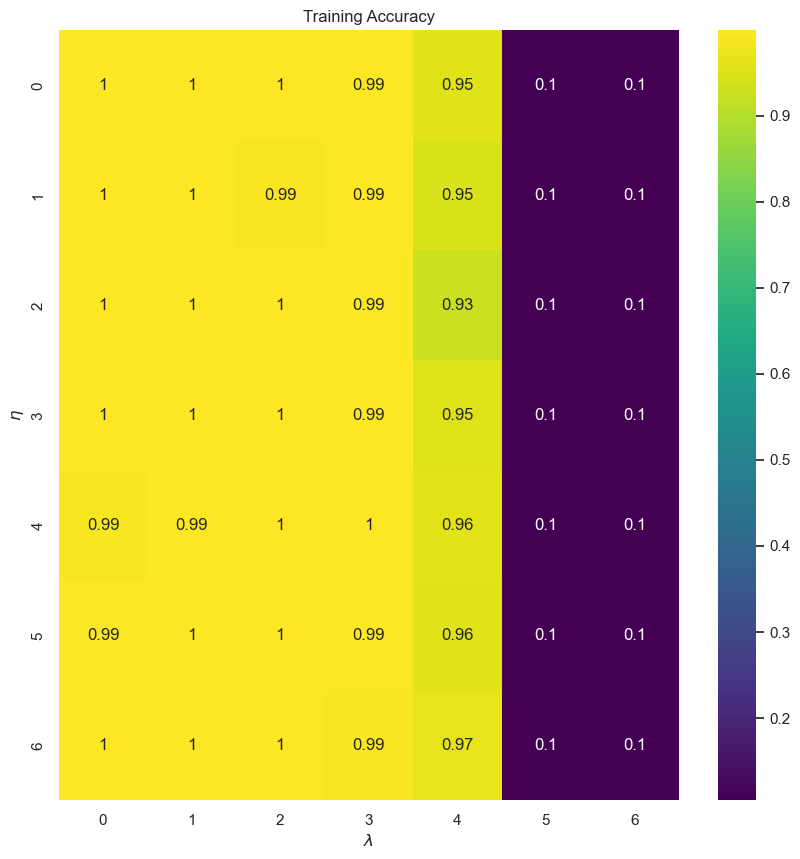

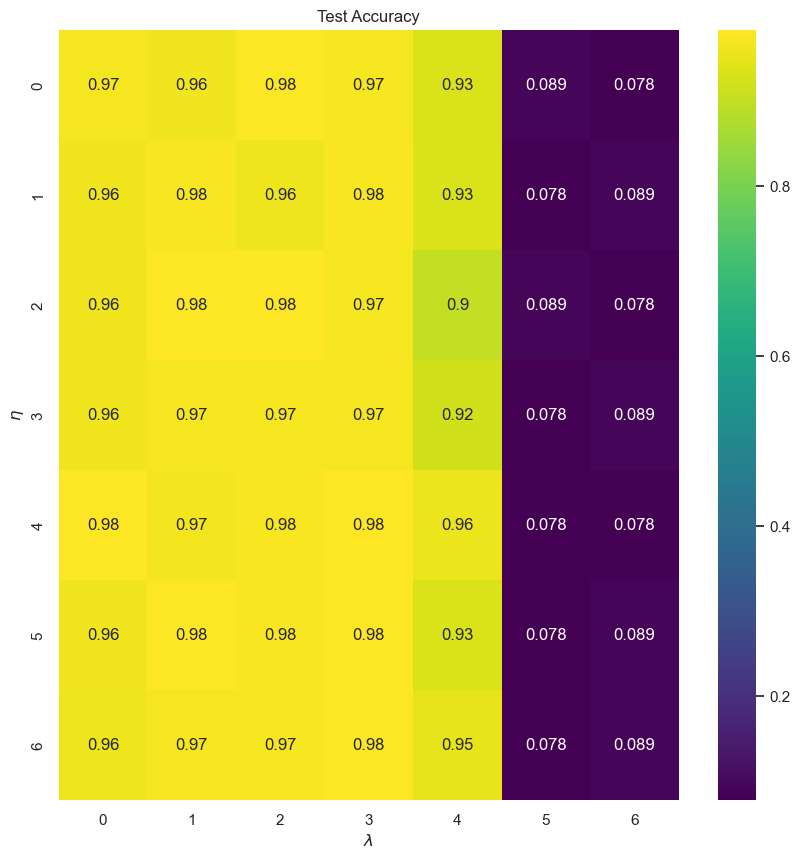

In [5]:
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        CNN = CNN_keras[i][j]

        train_accuracy[i][j] = CNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = CNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## The CIFAR01 data set

The CIFAR10 dataset contains 60,000 color images in 10 classes, with
6,000 images in each class. The dataset is divided into 50,000
training images and 10,000 testing images. The classes are mutually
exclusive and there is no overlap between them.

In [6]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# We import the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 by dividing by 255. 
train_images, test_images = train_images / 255.0, test_images / 255.0

## Verifying the data set

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

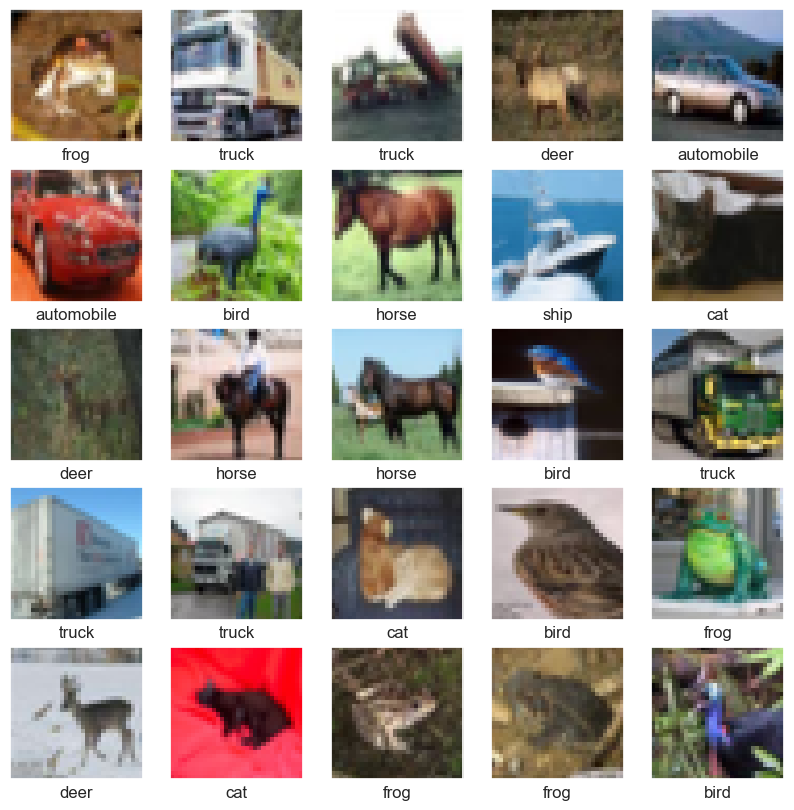

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Set up  the model

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of our model so far.

model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-tra

You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

## Add Dense layers on top

To complete our model, you will feed the last output tensor from the
convolutional base (of shape (4, 4, 64)) into one or more Dense layers
to perform classification. Dense layers take vectors as input (which
are 1D), while the current output is a 3D tensor. First, you will
flatten (or unroll) the 3D output to 1D, then add one or more Dense
layers on top. CIFAR has 10 output classes, so you use a final Dense
layer with 10 outputs and a softmax activation.

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
#Here's the complete architecture of our model.

model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_49 (Flatten)        (None, 1024)            

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

## Compile and train the model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

## Finally, evaluate the model

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Building code using Pytorch

This code loads and normalizes the MNIST dataset. Thereafter it defines  a CNN architecture with:
1. Two convolutional layers

2. Max pooling

3. Dropout for regularization

4. Two fully connected layers

It uses the Adam optimizer and for cost function it employs the
Cross-Entropy function. It trains for 10 epochs.
You can modify the architecture (number of layers, channels, dropout
rate) or training parameters (learning rate, batch size, epochs) to
experiment with different configurations.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

# Load datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN model
class CNN(nn.Module):
   def __init__(self):
       super(CNN, self).__init__()
       self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
       self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
       self.pool = nn.MaxPool2d(2, 2)
       self.fc1 = nn.Linear(64*7*7, 1024)
       self.fc2 = nn.Linear(1024, 10)
       self.dropout = nn.Dropout(0.5)

   def forward(self, x):
       x = self.pool(F.relu(self.conv1(x)))
       x = self.pool(F.relu(self.conv2(x)))
       x = x.view(-1, 64*7*7)
       x = self.dropout(F.relu(self.fc1(x)))
       x = self.fc2(x)
       return x

# Initialize model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
   model.train()
   running_loss = 0.0
   for batch_idx, (data, target) in enumerate(train_loader):
       data, target = data.to(device), target.to(device)
       optimizer.zero_grad()
       outputs = model(data)
       loss = criterion(outputs, target)
       loss.backward()
       optimizer.step()
       running_loss += loss.item()

   print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
   for data, target in test_loader:
       data, target = data.to(device), target.to(device)
       outputs = model(data)
       _, predicted = torch.max(outputs.data, 1)
       total += target.size(0)
       correct += (predicted == target).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:02<00:00, 4924328.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 249380.73it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 2471183.57it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 992111.70it/s]